1. Make a binary classification dataset with Scikit-Learn's make_moons() function.
    - For consistency, the dataset should have 1000 samples and a random_state=42.
    - Turn the data into PyTorch tensors. Split the data into training and test sets using train_test_split with 80% training and 20% testing.

In [1]:
from sklearn.datasets import make_moons
import torch

X, y = make_moons(n_samples=1000, random_state=42, )
X.shape, y.shape

((1000, 2), (1000,))

In [2]:
X, y = torch.from_numpy(X).type(torch.float), torch.from_numpy(y).type(torch.float)
type(X), type(y)

(torch.Tensor, torch.Tensor)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

2. Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
    - Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [16]:
from torch import nn
device = 'cuda' if torch.cuda.is_available() else "cpu"
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=8)
        self.relu = nn.ReLU()
        self.layer_2 = nn.Linear(in_features=8, out_features=16)
        self.layer_3 = nn.Linear(in_features=16, out_features=8)
        self.layer_4 = nn.Linear(8, 1)

    def forward(self, x):
        x = self.layer_1(x)
        x = self.relu(x)
        x = self.layer_2(x)
        x = self.relu(x)
        x = self.layer_3(x)
        x = self.relu(x)
        x = self.layer_4(x)
        return x
    
model = Model().to(device)
print(model)

Model(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (layer_2): Linear(in_features=8, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=8, bias=True)
  (layer_4): Linear(in_features=8, out_features=1, bias=True)
)


3. Setup a binary classification compatible loss function and optimizer to use when training the model.

In [17]:
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr= 0.1)

4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
    - To measure model accuracy, you can create your own accuracy function or use the accuracy function in TorchMetrics.
Train the model for long enough for it to reach over 96% accuracy.
    - The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [14]:
def accuracy(preds, truth):
    correct = torch.eq(preds, truth).sum().item()
    acc = correct / len(preds) * 100
    return acc

In [18]:
torch.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
    model.train()

    logits = model(X_train).squeeze()
    loss = loss_fn(logits, y_train)
    acc = accuracy(torch.round(torch.sigmoid(logits)), y_train)
    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy(torch.round(torch.sigmoid(test_logits)), y_test)
        if epoch % 100 == 0:
            print(f"epoch {epoch} | train loss: {loss:.6f} | train accuracy: {acc:.2f}% | test loss: {test_loss:.6f} | test accuracy: {test_acc:.2f}%")

    

epoch 0 | train loss: 0.696521 | train accuracy: 51.00% | test loss: 0.709648 | test accuracy: 46.00%
epoch 100 | train loss: 0.443694 | train accuracy: 80.00% | test loss: 0.459215 | test accuracy: 76.00%
epoch 200 | train loss: 0.239132 | train accuracy: 89.12% | test loss: 0.260114 | test accuracy: 87.50%
epoch 300 | train loss: 0.211205 | train accuracy: 90.50% | test loss: 0.231038 | test accuracy: 89.50%
epoch 400 | train loss: 0.167630 | train accuracy: 92.62% | test loss: 0.184073 | test accuracy: 91.50%
epoch 500 | train loss: 0.083769 | train accuracy: 97.25% | test loss: 0.093543 | test accuracy: 97.00%
epoch 600 | train loss: 0.028712 | train accuracy: 100.00% | test loss: 0.032267 | test accuracy: 100.00%
epoch 700 | train loss: 0.013061 | train accuracy: 100.00% | test loss: 0.014715 | test accuracy: 100.00%
epoch 800 | train loss: 0.007706 | train accuracy: 100.00% | test loss: 0.008668 | test accuracy: 100.00%
epoch 900 | train loss: 0.005244 | train accuracy: 100.00% |

5. Make predictions with your trained model and plot them using the plot_decision_boundary() function created in this notebook.

In [23]:
model.eval()
with torch.inference_mode():
    logits = model(X_test)
preds = torch.round(torch.sigmoid(logits)).squeeze()

In [24]:
preds

tensor([0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
        1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
        0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
        1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
        1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
        1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
        0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
        0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
        1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
        1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
        1., 1.])

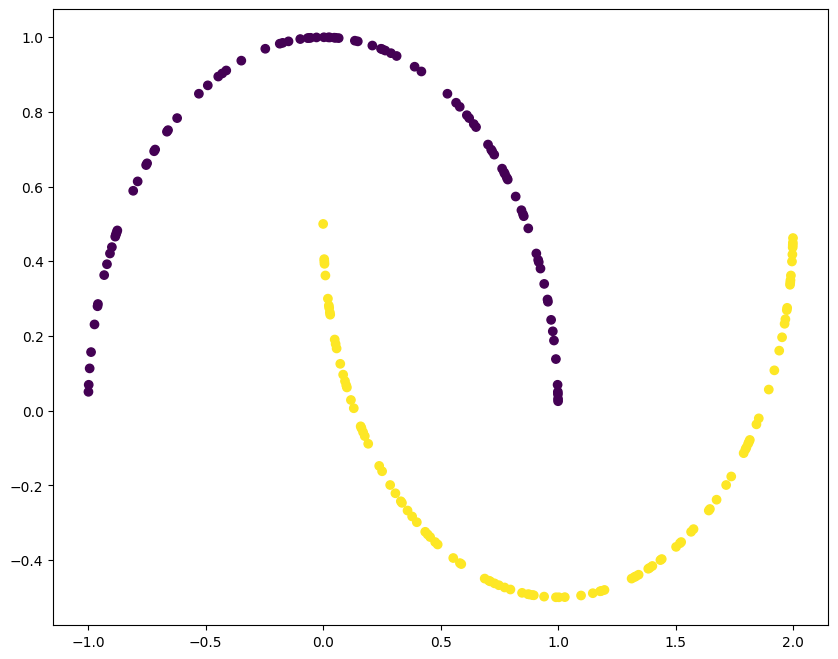

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=preds)

C:\Users\newah\AppData\Local\Temp\ipykernel_10348\3656053334.py:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
C:\Users\newah\AppData\Local\Temp\ipykernel_10348\3656053334.py:11: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  np.arange(y_min, y_max, h))


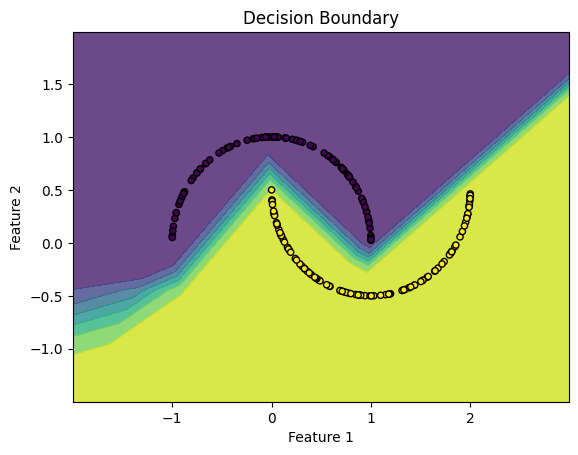

In [30]:
import numpy as np

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01  # step size in the mesh

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Convert the grid to a tensor
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float)

    # Predict the function value for the whole grid
    model.eval()
    with torch.inference_mode():
        Z = model(grid).reshape(xx.shape)
        Z = torch.sigmoid(Z)  # Apply sigmoid if the model's output is logits

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()


plot_decision_boundary(model, X_test, y_test)

6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
Feel free to reference the ML cheatsheet website for the formula.

In [ ]:
# nn.Tanh()

7. Create a multi-class dataset using the spirals data creation function from CS231n.
    - Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
    - Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
    - Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).
    - Plot the decision boundaries on the spirals dataset from your model predictions, the plot_decision_boundary() function should work for this dataset too.

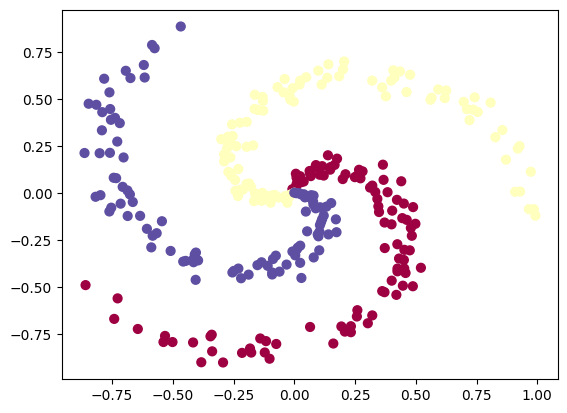

In [37]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [38]:
X = torch.from_numpy(X).type(torch.float).to(device)
y = torch.from_numpy(y).type(torch.LongTensor).to(device)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([240, 2]),
 torch.Size([60, 2]),
 torch.Size([240]),
 torch.Size([60]))

In [39]:
from torch import nn
device = 'cuda' if torch.cuda.is_available() else "cpu"
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=8)
        self.relu = nn.ReLU()
        self.layer_2 = nn.Linear(in_features=8, out_features=16)
        self.layer_3 = nn.Linear(in_features=16, out_features=8)
        self.layer_4 = nn.Linear(8, 4)

    def forward(self, x):
        x = self.layer_1(x)
        x = self.relu(x)
        x = self.layer_2(x)
        x = self.relu(x)
        x = self.layer_3(x)
        x = self.relu(x)
        x = self.layer_4(x)
        return x
    
model = Model().to(device)
print(model)

Model(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (layer_2): Linear(in_features=8, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=8, bias=True)
  (layer_4): Linear(in_features=8, out_features=4, bias=True)
)


In [40]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= 0.1)

In [41]:
model(X_test)[:5]

tensor([[-0.0322,  0.1919, -0.1685, -0.0460],
        [-0.0250,  0.1823, -0.1661, -0.0423],
        [-0.0278,  0.1770, -0.1675, -0.0432],
        [-0.0113,  0.1782, -0.1767, -0.0394],
        [-0.0292,  0.1771, -0.1678, -0.0435]], grad_fn=<SliceBackward0>)

In [44]:
torch.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
    model.train()

    logits = model(X_train).squeeze()
    loss = loss_fn(logits, y_train)
    acc = accuracy(torch.softmax(logits, dim=1).argmax(dim=1), y_train)
    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy(torch.softmax(test_logits, dim=1).argmax(dim=1), y_test)
        if epoch % 100 == 0:
            print(f"epoch {epoch} | train loss: {loss:.6f} | train accuracy: {acc:.2f}% | test loss: {test_loss:.6f} | test accuracy: {test_acc:.2f}%")

    

epoch 0 | train loss: 1.289606 | train accuracy: 33.33% | test loss: 1.179389 | test accuracy: 33.33%
epoch 100 | train loss: 0.017658 | train accuracy: 99.58% | test loss: 0.049565 | test accuracy: 98.33%
epoch 200 | train loss: 0.009329 | train accuracy: 99.58% | test loss: 0.044573 | test accuracy: 98.33%
epoch 300 | train loss: 0.008456 | train accuracy: 99.58% | test loss: 0.057388 | test accuracy: 98.33%
epoch 400 | train loss: 0.007654 | train accuracy: 99.58% | test loss: 0.068808 | test accuracy: 98.33%
epoch 500 | train loss: 0.007245 | train accuracy: 99.58% | test loss: 0.078608 | test accuracy: 98.33%
epoch 600 | train loss: 0.007020 | train accuracy: 99.58% | test loss: 0.086380 | test accuracy: 98.33%
epoch 700 | train loss: 0.006863 | train accuracy: 99.58% | test loss: 0.093073 | test accuracy: 98.33%
epoch 800 | train loss: 0.006750 | train accuracy: 99.58% | test loss: 0.098778 | test accuracy: 98.33%
epoch 900 | train loss: 0.006645 | train accuracy: 99.58% | test l

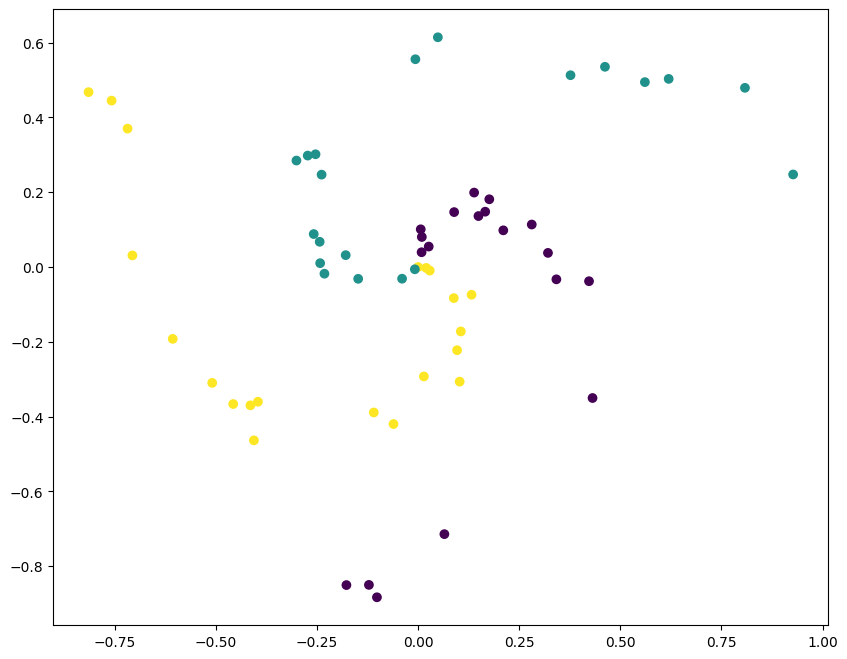

In [47]:
model.eval()
with torch.inference_mode():
    logits = model(X_test)
preds = torch.softmax(logits, dim=1).argmax(dim=1)

plt.figure(figsize=(10, 8))

plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=preds)

C:\Users\newah\AppData\Local\Temp\ipykernel_10348\2456341840.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
C:\Users\newah\AppData\Local\Temp\ipykernel_10348\2456341840.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  np.arange(y_min, y_max, h))


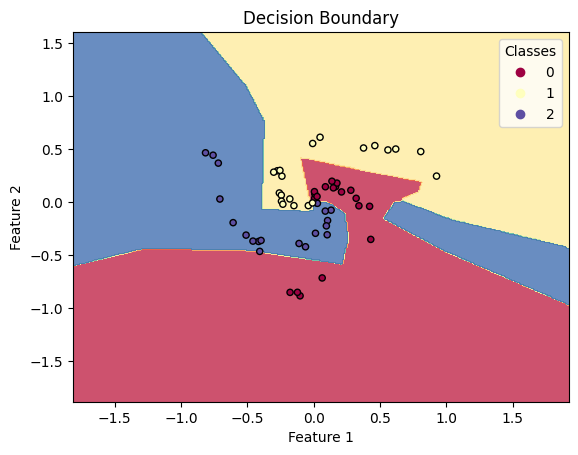

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import torch

def plot_decision_boundary(model, X, y, num_classes=4):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01  # step size in the mesh

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Convert the grid to a tensor
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

    # Predict the function value for the whole grid
    model.eval()
    with torch.inference_mode():
        Z = model(grid)
        Z = torch.argmax(Z, axis=1).reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()


plot_decision_boundary(model, X_test, y_test)